# Problem set 8

## Name: [Yawen Tan]

## Link to your PS8 github repo: [https://github.com/IsabellaTan/Brown-DATA1030-HW8#]

### Problem 0 

-2 points for every missing green OK sign. 

Make sure you are in the DATA1030 environment.

In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12.10 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.10"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.10"):
    print(FAIL, "Python version 3.12.10 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "2.2.5", 'matplotlib': "3.10.1",'sklearn': "1.6.1", 
                'pandas': "2.2.3",'xgboost': "3.0.0", 'shap': "0.47.2", 
                'polars': "1.27.1", 'seaborn': "0.13.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.10

[ OK ] numpy version 2.2.5 is installed.
[ OK ] matplotlib version 3.10.1 is installed.
[ OK ] sklearn version 1.6.1 is installed.
[ OK ] pandas version 2.2.3 is installed.
[ OK ] xgboost version 3.0.0 is installed.
[ OK ] shap version 0.47.2 is installed.
[ OK ] polars version 1.27.1 is installed.
[ OK ] seaborn version 0.13.2 is installed.


## Problem 1

One ML algorithm we didn't cover during class is the nearest neighbor algorithm. The principle behind nearest neighbors is to base your prediction for a given point on the true labels of a predefined number of training samples closest to that point in the feature space. The predicted label is some sort of average of the true labels of the nearest neighbors. The number of nearest neighbors is a user-defined constant (k-nearest neighbor learning) which is one of the hyperparameters you'll need to tune. 

The challenge in this technique is the distance metric. How do you measure the distance between two points in the feature space? This is non-trivial question because usually different continuous features have different units and order of magnitudes, some features are one-hot-encoded, some features are ordinal. The key to successfully apply this method is usually to create a custom distance metric tailored to your dataset. However the standard Euclidean (geometric) distance is often used after the features are standard scaled.

**(This is not necessary to know, but is still interesting)** The nearest-neighbor algorithm is unique because there is no model to train. The algorithm merely stores the training data in memory, and then checks which training points are closest to a given prediction point. This makes the nearest-neighbor algorithm train in O(1) time, but predict in O(n) time (with n referring to the number of **training** points, not testing). Generally, this is the opposite of what we want in an ML model -- it's much better to spend time precomputing than it is to spend time while predicting. Regardless, nearest-neighbors is still a very useful algorithm in some circumstances!

Read more about this method [here](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification) and [here](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-regression).

### Problem 1a (10 points)

In this problem, we will implement nearest neighbor regression. Read the manual of KNeighborsRegressor. Let's study how the `n_neighbors` parameter impacts the prediction.

Please recreate the toy regression dataset from the lecture notes (Lecture 16, SVM regression) with n_samples = 30. Split the data into train and validation (70-30). Train models with n_neighbors = 1 to 10. Plot the train and validation scores using an evaluation metric of your choice as a function of n_neighbors.

Next, visualize the models by creating more plots that display the train/val points with different colors, the true function, and the model predictions for the various n_neighbors values. Use trained models with n_neighbors = [1,3,10,30]. You will encounter an error message. Why? How do you fix it? Explain in a paragraph!

Answer the following questions and explain your answer. 
   - What `n_neighbors` value produces a high bias (low variance) model? What `n_neighbors` value produces a high variance (low bias) model? How do overfitting and underfitting show up in the models?
   - How does the model behave with respect to outliers?
   - Explain why the model prediction is a step function and how this step function differs from a decision tree step function!

Based on the manual, what other parameter has a strong influence on the predictions? Prepare another figure to prove your point. 

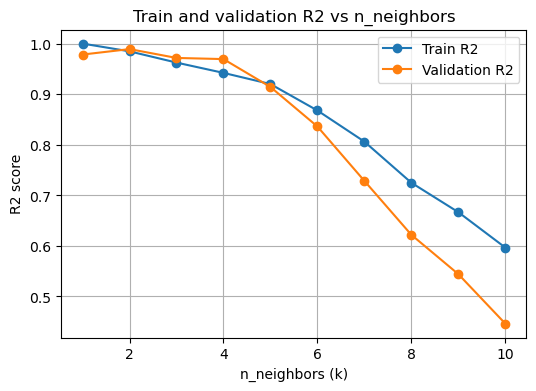

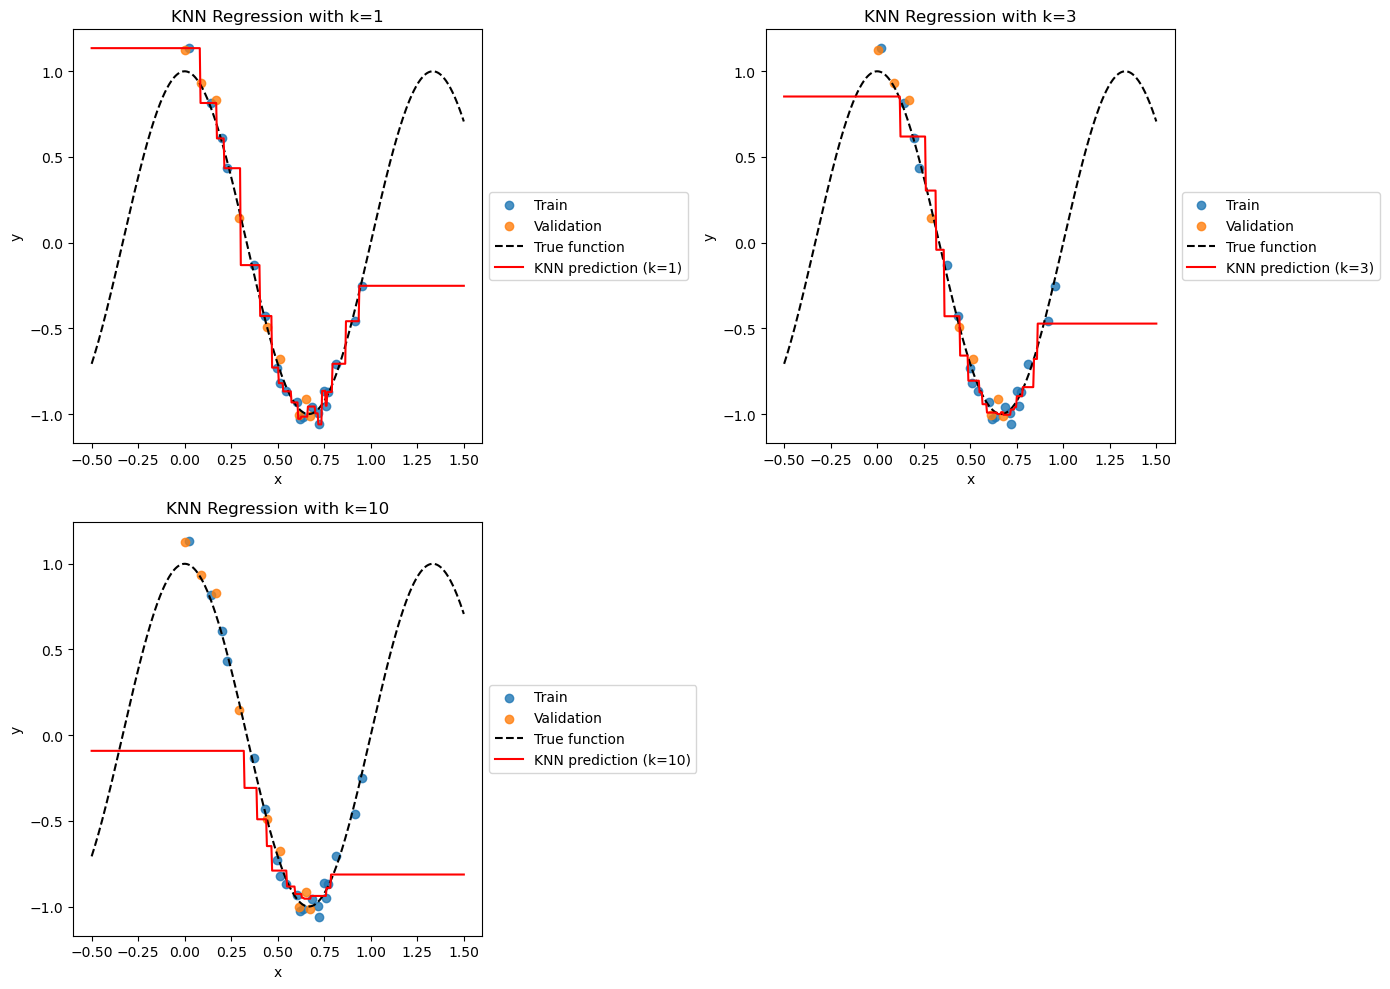

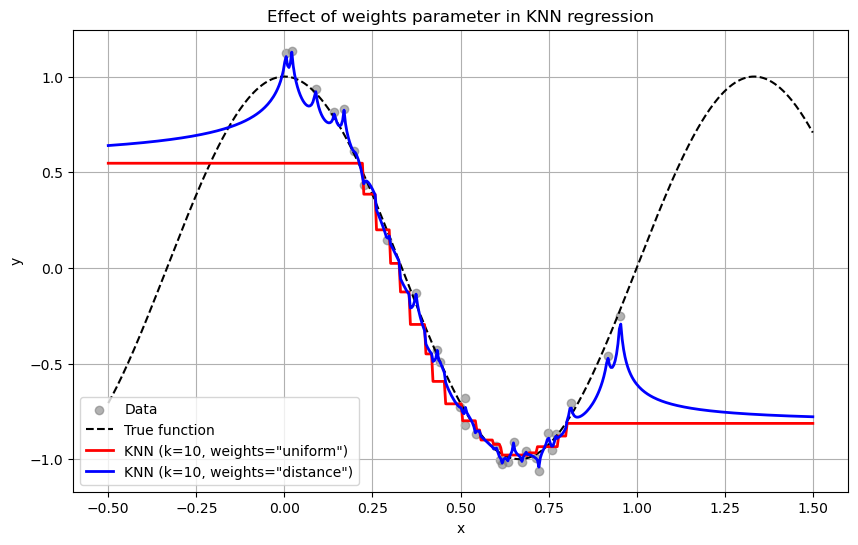

In [23]:
# your code here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 
import warnings
warnings.filterwarnings("ignore")


np.random.seed(10)
def true_fun(X):
    return np.cos(1.5 * np.pi * X)
n_samples = 30 
X = np.random.rand(n_samples)
y = true_fun(X) + np.random.randn(n_samples) * 0.1

X = X[:, np.newaxis] # adjust X into shape (n_samples, 1), so that it can be fed to sklearn

# Split the data into training and validation sets (70% train, 30% val)
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3, random_state=42)

# Define k values from 1 to 10
k_values = range(1, 11)
# Lists to store R2 scores
train_scores = []
val_scores = []
# Loop over k values
for k in k_values:
    # Create and fit the KNN regressor
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train, y_train)
    # Make predictions on training and validation sets
    y_train_pred = knn_reg.predict(X_train)
    y_val_pred = knn_reg.predict(X_val)
    # Calculate R2 scores for training and validation sets
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    # Store the scores
    train_scores.append(train_r2)
    val_scores.append(val_r2)

# Plot the R2 scores
plt.figure(figsize=(6,4))
plt.plot(k_values, train_scores, marker='o', label='Train R2')
plt.plot(k_values, val_scores, marker='o', label='Validation R2')
plt.xlabel('n_neighbors (k)')
plt.ylabel('R2 score')
plt.title('Train and validation R2 vs n_neighbors')
plt.legend()
plt.grid(True)
plt.show()



X_plot = np.linspace(-0.5, 1.5, 500)[:, np.newaxis]  # Extended range for plotting
y_true_plot = true_fun(X_plot.ravel()) # true function values for plotting
# k_list = [1, 3, 10, 30] # 30 is larger than training set size, so it will raise warning
plt.figure(figsize=(14, 10))
k_list = [1, 3, 10] # deleted 30 to avoid warning or change 31 to 21

for k in k_list:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train, y_train)
    y_pred_plot = knn_reg.predict(X_plot)
    plt.subplot(2, 2, k_list.index(k) + 1)
    # Plot training/validation points: to distinguish, we can still mark train & val
    plt.scatter(X_train, y_train, color='tab:blue', label='Train', alpha=0.8)
    plt.scatter(X_val, y_val, color='tab:orange', label='Validation', alpha=0.8)
    # Plot true function
    plt.plot(X_plot, y_true_plot, 'k--', label='True function')
    # Plot KNN predictions
    plt.plot(X_plot, y_pred_plot, 'r', label=f'KNN prediction (k={k})')
    
    plt.title(f'KNN Regression with k={k}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()




# Compare uniform vs distance weighting
k = 10  # fix k to isolate the effect of weights
knn_uniform = KNeighborsRegressor(n_neighbors=k, weights='uniform')
knn_distance = KNeighborsRegressor(n_neighbors=k, weights='distance')
# Fit both models on the full dataset
knn_uniform.fit(X, y)
knn_distance.fit(X, y)

y_pred_uniform = knn_uniform.predict(X_plot)
y_pred_distance = knn_distance.predict(X_plot)

plt.figure(figsize=(10, 6))

# Plot training points
plt.scatter(X, y, color='gray', alpha=0.6, label='Data')
# Plot true function
plt.plot(X_plot, y_true_plot, 'k--', label='True function')
# Plot uniform-weighted KNN
plt.plot(X_plot, y_pred_uniform, 'r', linewidth=2,
         label=f'KNN (k={k}, weights="uniform")')
# Plot distance-weighted KNN
plt.plot(X_plot, y_pred_distance, 'b', linewidth=2,
         label=f'KNN (k={k}, weights="distance")')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Effect of weights parameter in KNN regression")
plt.legend()
plt.grid(True)
plt.show()




**your explanation here**

1. Use trained models with n_neighbors = [1,3,10,30]. You will encounter an error message. Why? How do you fix it? Explain in a paragraph!
- When I tried to train a KNeighborsRegressor model with n_neighbors = 30 on the training set, I got a ValueError saying that n_neighbors must be less than or equal to the number of training samples. After the 70/30 train-validation split, the training set contains only 21 points, so it is impossible to select 30 nearest neighbors. To fix this issue, I delete n_neighbors = 30, but we can also use the full dataset (30 points) when fitting the models for the visualization part, or we can change n_neighbors = 30 to n_neighbors = 21 which is the largest value or we can expand the data set. 

2. What `n_neighbors` value produces a high bias (low variance) model? What `n_neighbors` value produces a high variance (low bias) model? How do overfitting and underfitting show up in the models?
- Small values of n_neighbors, such as k = 1, produce a low-bias, high-variance model. 
- Large values of n_neighbors, such as k = 10, create a high-bias, low-variance model. 
- When k is very small, the KNN regressor fits almost every fluctuation in the training data, including noise, which leads to overfitting. This is reflected in your plots: the prediction curve with k = 1 is extremely jagged and changes abruptly wherever the nearest training sample changes; When k is very large, the model averages many points together. This makes the prediction much smoother, but also means it can’t follow the real shape of the underlying function anymore. In the k = 10 plot, the curve becomes too flat and misses the true peaks and dips, which shows underfitting.

3. How does the model behave with respect to outliers?
- KNN regression can be sensitive to outliers. If an outlier happens to be one of the k closest points to a test sample, its unusual value will pull the local average toward itself and can noticeably change the prediction in that area. This problem is most obvious when k is small, because each neighbor has a lot of influence. When k is larger, the effect of a single outlier is reduced because it gets averaged together with many normal points. This makes the model a bit more stable, but not fully protected, outliers can still create small bumps or strange flat regions in the prediction curve.

4. Explain why the model prediction is a step function and how this step function differs from a decision tree step function!
- KNN regression produces a step function because the prediction at a query point is the average of its k nearest neighbors. As the query point moves along the x-axis, the set of k nearest neighbors stays the same within certain intervals and only changes at specific boundaries. Whenever the neighbor set stays constant, the prediction stays constant too, which creates a flat step. When the neighbor set changes, the prediction jumps to a new level. Thus, the step function arises naturally from distance relationships in the data. A decision tree also yields a step-like function, but for a completely different reason. A tree explicitly splits the feature space using learned thresholds, and each region is assigned a constant value. In other words, tree steps come from learned rules, whereas KNN steps come from neighborhoods determined by distances to the training points. Tree boundaries are axis-aligned and chosen by the model; KNN boundaries are irregular and determined purely by the geometry of the data.

5. Based on the manual, what other parameter has a strong influence on the predictions? Prepare another figure to prove your point. 
- Besides n_neighbors, the weights parameter has a strong influence on the behavior of the KNeighborsRegressor. With weights='uniform', all k neighbors contribute equally to the prediction, so the model performs a simple average. With weights='distance', closer neighbors receive higher weights, which makes the prediction more sensitive to the local structure of the data. In the figure, I fix k = 10 and compare the two weight settings. The uniform-weighted model produces a more block-like step function, while the distance-weighted model tracks the data more closely and shows smoother transitions. 

### Problem 1b (5 points)

Next, we'll implement the nearest neighbors algorithm for a classification problem! Please import KNeighborsClassifier and read the manual. Let's study how the `n_neighbors` parameters impact the prediction.

Please recreate the toy classification dataset from the lecture notes (Lecture 16, SVM classification, make_moons dataset). 

Prepare a plot that shows predictions for n_neighbors = 1, 10, 30, and 100. Prepare the plots yourself in the notebook using matplotlib or seaborn.

Explain in a paragraph when KNeighborsClassifier underfits and overfits. You can either make an argument based on the figures you prepared or you can split the dataset to train/val (70-30), train models, calculate the train and validation scores using an evaluation metric of your choice, and plot the scores. 


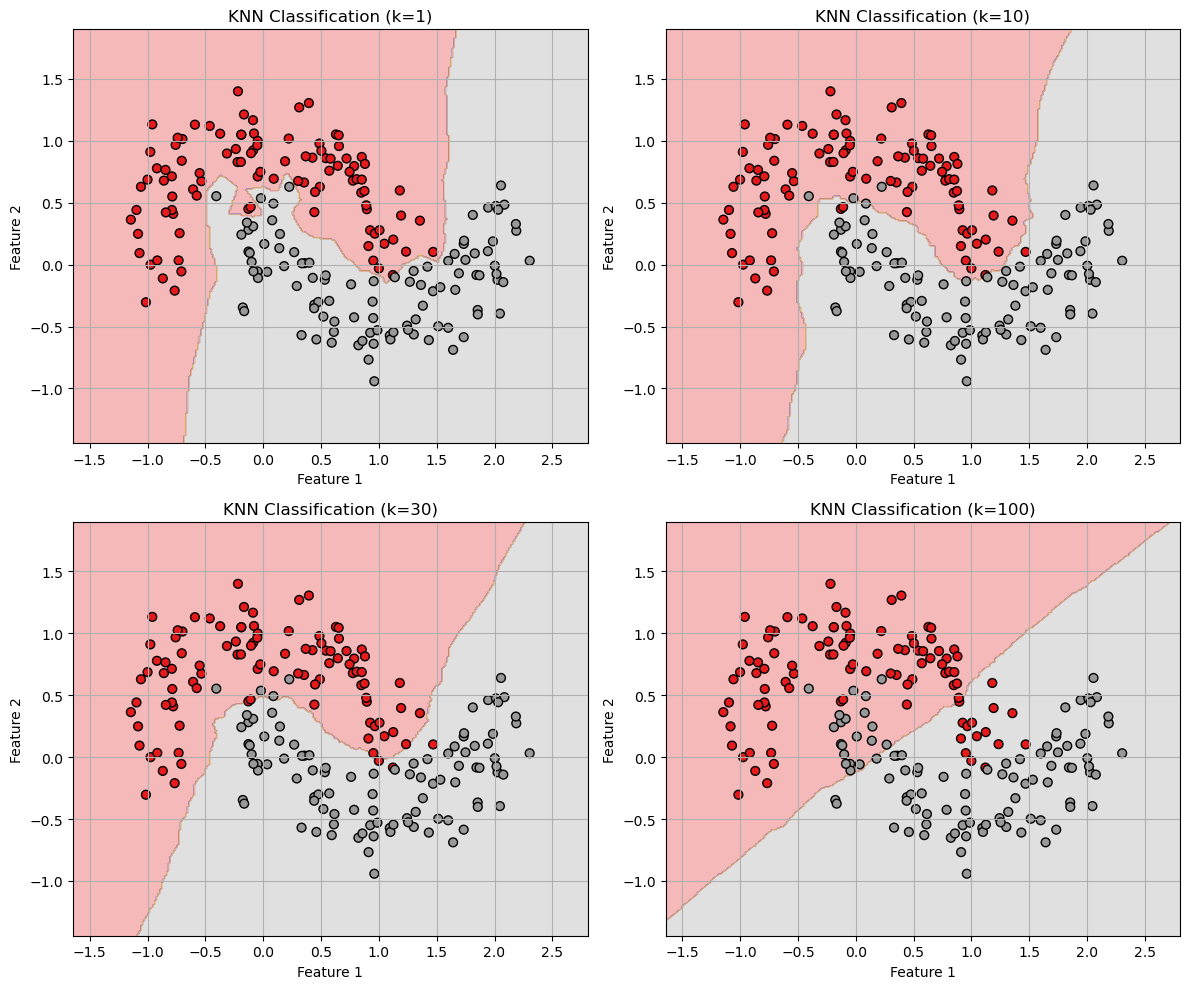

In [9]:
# your code here 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier

# Generate toy dataset
X, y = make_moons(n_samples=200, noise=0.2, random_state=1)

# Prepare the grid for plotting decision boundaries
x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
# Create a mesh grid
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300))
grid_points = np.c_[xx.ravel(), yy.ravel()]  # shape (90000, 2)

# Try different k values
k_list = [1, 10, 30, 100]

plt.figure(figsize=(12, 10))
# Loop over k values and plot decision boundaries
for i, k in enumerate(k_list, start=1):

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)  # fit on the whole dataset
    Z = knn.predict(grid_points).reshape(xx.shape) # reshape to grid shape
    plt.subplot(2, 2, i)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Set1, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Set1, edgecolors='k', s=40)
    plt.title(f"KNN Classification (k={k})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)

plt.tight_layout()
plt.show()



**your explanation here**

Based on the decision boundary plots, the KNeighborsClassifier overfits when n_neighbors is very small, such as k = 1. In this case, the decision boundary becomes extremely irregular and closely follows the noise in the training data. The model has very low bias and very high variance, which is characteristic of overfitting. In contrast, the classifier underfits when n_neighbors is large, such as k = 100. With so many neighbors averaged together, the decision boundary becomes overly smooth and nearly linear, failing to capture the curved structure of the data. This indicates high bias and low variance, which corresponds to underfitting. The intermediate value k = 10 provides a more balanced decision boundary that captures the data structure without fitting to noise.

## Problem 2

Let's play around with more algorithms! In this problem, you will work with the diabetes dataset and try different ML algorithms to figure out which one is the best. Whenever you work with a new dataset, you want to try as many algorithms on it as possible because you can't know in advance which algorithm (and hyperparameters) will be the best.

Generally you need to decide five things when you build an ML pipeline:
- your splitting strategy
- how to preprocess the data
- what evaluation metric you'll use
- what ML algorithms you will try
- what paramater grid you should use for each ML algorithm

You'll write a function in problem 2a that takes a preprocessor, an ML algorithm, and its corresponding parameter grid as inputs and it will calculate test scores and return the best models. The splitting strategy and the evaluation metric are not inputs to this function but predefined.

### Problem 2a (15 points)

Write a function which takes the unprocessed feature matrix, target variable, a preprocessor (ColumnTransformer), an initialized ML algorithm, and a corresponding parameter grid as inputs. Do the following inside the function:
 1. split the data to other and test (80-20) and then use KFold with 4 folds
 2. preprocess the data and perform cross validation (I recommend you use GridSearchCV)
 3. Finally, calculate the test score. Use RMSE as your evaluation metric. 
 
 Repeat this 10 times for 10 different random states, and the function should return the 10 best models and the 10 test scores. Returning multiple models and test scores ensures that a machine learning model works similarly despite different random states. 
 
 The skeleton of the function is provided for convenince.

The function name contains the splitting strategy and the evaluation metric (i.e., `MLpipe_KFold_RMSE`). It would be difficult (but not impossible) to write a general `MLpipe` function that takes a splitter and an evaluation metric also as inputs for two reasons:
- some splitters are difficult to pass as a function argument (e.g., two train_test_split steps, or a train_test_split combined with a KFold),
- some evaluation metrics need to be maximized (like accuracy, R2, f_beta), while others need to be minimized (like logloss, RMSE) and the code for these two options differ.

For now, I recommend that if you need to try multiple ML algorithms, write a function that's specific to a splitting strategy and an evaluation metric and add a description to the function as shown in MLpipe_KFold_RMSE. Such functions make it very easy to try many ML algorithms on your dataset and I recommend you write a similar function for your project.

Add plenty of test and print statements to make sure your code works correctly and it does what you expect it to do. You are encouraged to: print the sets and their shapes before and after preprocessing, print the GridSearchCV results, print the test scores, and more.

Test the function with linear regression models that use l1 regularization. Fix any warnings you might encounter. Print out the mean and the standard deviation of the test scores.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso   # L1 regularized linear regression
from sklearn.metrics import mean_squared_error
# read in the dataset as a dataframe
df = pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", sep='\t')

# create target series and feature matrix 
y = df['Y']
X = df.loc[:, df.columns != 'Y']
print("Shape of feature matrix X:", X.shape)
print("Shape of target y:", y.shape)
# print the first few rows of X
print(X.head())

# Select categorical and numeric features
categorical_features = ["SEX"]
numeric_features = [col for col in X.columns if col != "SEX"]
# Preprocessing for numeric features and categorical features
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])
categorical_transformer = Pipeline(steps=[("onehot", OneHotEncoder(drop="first"))]  )
# Using ColumnTransformer to apply the numeric transformer to all numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)])
print("Preprocessor created (ColumnTransformer)")


# function for the ML pipeline as outlined above 
def MLpipe_KFold_RMSE(X, y, preprocessor, ML_algo, param_grid):
    '''
    This function splits the data to other/test (80/20) and then applies KFold with 4 folds to other.
    The RMSE is minimized in cross-validation.

    You should:
    1. Loop through 10 different random states
    2. Split your data 
    3. Fit a model using GridSearchCV with KFold and the predefined Preprocessor 
    4. Calculate the model's error on the test set 
    5. Return a list of 10 test scores and 10 best models 
    ----------------------------------------------------------
    Inputs
    X : Unprocessed feature matrix.
    y : Target variable.
    preprocessor : ColumnTransformer
        Preprocessing steps (e.g., scaling, encoding).
    ML_algo : estimator
        Initialized ML algorithm, e.g., Lasso(), Ridge(), etc.
    param_grid :
        Parameter grid for GridSearchCV. Keys should use the
        name 'model__parameter', because we will call the final
        step in the Pipeline 'model'.
    ----------------------------------------------------------
    Returns
    test_scores : list of float
        List of 10 test RMSE values (one per random_state).
    best_models : list of estimators
        List of 10 best models (Pipeline objects) found by GridSearchCV.
    '''
    
    # lists to be returned 
    test_scores = []
    best_models = []

    # your code here...
    # Loop through 10 different random states
    for random_state in range(10):
        print("-----------------------------------------------")
        print(f"Random state = {random_state}")
        # Split the data into other/test (80/20)
        X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
        print(f"  Shape of X_other: {X_other.shape}, Shape of X_test: {X_test.shape}")
        # Define 4-fold KFold cross-validation on other
        kf = KFold(n_splits=4, shuffle=True, random_state=random_state)
        # Create a Pipeline with preprocessor and ML_algo
        pipe = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', ML_algo)])
        # Set up GridSearchCV with the pipeline, param_grid, and KFold
        grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid,
                                   cv=kf, scoring='neg_root_mean_squared_error')
        # Fit GridSearchCV on other data
        grid_search.fit(X_other, y_other)
        print("GridSearchCV Completed.")
        print("Best Parameter:", grid_search.best_params_)
        print(f"Best negative mean square error on CV: {grid_search.best_score_:.3f}" )
        # Get the best model
        best_model = grid_search.best_estimator_ 
        best_models.append(best_model)
        # Predict on the test set
        y_test_pred = best_model.predict(X_test)
        # Calculate RMSE on the test set
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        test_scores.append(test_rmse)
        print(f"Test RMSE: {test_rmse:.3f}")

    return test_scores, best_models


Shape of feature matrix X: (442, 10)
Shape of target y: (442,)
   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80
Preprocessor created (ColumnTransformer)


In [ ]:
# test your function with a linear regression model (l1 regularization)
# Initialize Lasso (L1 regularized linear regression)
lasso = Lasso(max_iter=10000,random_state=0) # increase max_iter to avoid convergence warnings

# Define parameter grid for alpha
param_grid_l1 = {"model__alpha": [0.001, 0.01, 0.1, 1, 10]}
# Call the MLpipe_KFold_RMSE function we defined
test_scores_l1, best_models_l1 = MLpipe_KFold_RMSE(
    X=X,
    y=y,
    preprocessor=preprocessor,
    ML_algo=lasso,
    param_grid=param_grid_l1)

# print results
print("\n--------- L1 Linear Regression (Lasso) Summary ---------")
print("Test RMSE scores:")
for i, score in enumerate(test_scores_l1):
    print(f"  Run {i}: {score:.3f}")
mean_rmse_l1 = np.mean(test_scores_l1)
std_rmse_l1 = np.std(test_scores_l1)
print(f"Mean RMSE: {mean_rmse_l1:.3f}")
print(f"Std of RMSE: {std_rmse_l1:.3f}")


-----------------------------------------------
Random state = 0
  Shape of X_other: (353, 10), Shape of X_test: (89, 10)
GridSearchCV Completed.
Best Parameter: {'model__alpha': 1}
Best negative mean square error on CV: -55.034
Test RMSE: 58.418
-----------------------------------------------
Random state = 1
  Shape of X_other: (353, 10), Shape of X_test: (89, 10)
GridSearchCV Completed.
Best Parameter: {'model__alpha': 1}
Best negative mean square error on CV: -55.011
Test RMSE: 55.004
-----------------------------------------------
Random state = 2
  Shape of X_other: (353, 10), Shape of X_test: (89, 10)
GridSearchCV Completed.
Best Parameter: {'model__alpha': 1}
Best negative mean square error on CV: -54.413
Test RMSE: 55.703
-----------------------------------------------
Random state = 3
  Shape of X_other: (353, 10), Shape of X_test: (89, 10)
GridSearchCV Completed.
Best Parameter: {'model__alpha': 1}
Best negative mean square error on CV: -54.183
Test RMSE: 55.848
------------

### Problem 2b (15 points)

Next, train the following models on the diabetes dataset:
- linear regression with l1 regularization (already completed in 2a)
- linear regression with l2 regularization 
- linear regression with an elastic net 
- RF
- SVR
- k nearest neighbor regression

Please determine what the parameter grid should be for each of these methods. Follow the guidance we discussed during the lecture.

Make sure your code is reproducable! When you rerun it, you should get back the exact same test scores and best hyperparameters in each run. So fix your random states where ever necessary.

Which algorithm is the best on the diabetes dataset based on the mean and standard deviation of the test scores? Write a paragraph or two and describe your findings. 

In [22]:
# your code here

from sklearn.linear_model import Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import numpy as np


# L1 Regression (Lasso) 

lasso_param = {'model__alpha': [0.001, 0.01, 0.1, 1, 10]}
print("----- Lasso (L1) Regression -----")
test_scores_l1, best_models_l1 = MLpipe_KFold_RMSE(X, y, preprocessor, lasso, lasso_param)
print("L1 Test RMSE scores:", np.round(test_scores_l1, 3))
print(f"L1 Mean RMSE: {np.mean(test_scores_l1):.3f}")
print(f"L1 Std RMSE: {np.std(test_scores_l1):.3f}\n")


# L2 Regression (Ridge)
# Initialize Ridge (L2 regularized linear regression)
ridge = Ridge(random_state=0)
# Define parameter grid for alpha
ridge_param = {'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100,1000]}

print("----- Ridge (L2) Regression -----")
test_scores_l2, best_models_l2 = MLpipe_KFold_RMSE(X, y, preprocessor, ridge, ridge_param)
print("L2 Test RMSE scores:", np.round(test_scores_l2, 3))
print(f"L2 Mean RMSE: {np.mean(test_scores_l2):.3f}")
print(f"L2 Std RMSE: {np.std(test_scores_l2):.3f}\n")


# Elastic Net Regression

elastic = ElasticNet(max_iter=5000, random_state=0)
elastic_param = {
    'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'model__l1_ratio': [0.1, 0.5, 0.9]}

print("----- Elastic Net Regression -----")
test_scores_en, best_models_en = MLpipe_KFold_RMSE(X, y, preprocessor, elastic, elastic_param)
print("Elastic Net RMSE:", np.round(test_scores_en, 3))
print(f"Elastic Net Mean: {np.mean(test_scores_en):.3f}")
print(f"Elastic Net Std: {np.std(test_scores_en):.3f}\n")


# Random Forest Regressor

rf = RandomForestRegressor(random_state=0)
rf_param = {
    'model__n_estimators': [100, 200, 500],
    'model__max_depth': [3, 5, 10, 30],
    'model__max_features': [0.3, 0.5, 0.7, 0.9]}

print("----- Random Forest Regression -----")
test_scores_rf, best_models_rf = MLpipe_KFold_RMSE(X, y, preprocessor, rf, rf_param)
print("RF RMSE:", np.round(test_scores_rf, 3))
print(f"RF Mean: {np.mean(test_scores_rf):.3f}")
print(f"RF Std: {np.std(test_scores_rf):.3f}\n")


# Support Vector Regressor (SVR)

svr = SVR()
svr_param = {
    'model__C': [0.1, 1, 10, 100],
    'model__gamma': ['scale', 0.01, 0.1, 1],
    'model__epsilon': [0.01, 0.1, 1]}

print("----- Support Vector Regression (SVR) -----")
test_scores_svr, best_models_svr = MLpipe_KFold_RMSE(X, y, preprocessor, svr, svr_param)
print("SVR RMSE:", np.round(test_scores_svr, 3))
print(f"SVR Mean: {np.mean(test_scores_svr):.3f}")
print(f"SVR Std: {np.std(test_scores_svr):.3f}\n")


# K Nearest Neighbors Regression

knn = KNeighborsRegressor()
knn_param = {
    'model__n_neighbors': [3, 5, 10, 20, 50],
    'model__weights': ['uniform', 'distance']}

print("----- KNN Regression -----")
test_scores_knn, best_models_knn = MLpipe_KFold_RMSE(
    X, y, preprocessor, knn, knn_param)
print("KNN RMSE:", np.round(test_scores_knn, 3))
print(f"KNN Mean: {np.mean(test_scores_knn):.3f}")
print(f"KNN Std: {np.std(test_scores_knn):.3f}\n")



----- Lasso (L1) Regression -----
-----------------------------------------------
Random state = 0
  Shape of X_other: (353, 10), Shape of X_test: (89, 10)
GridSearchCV Completed.
Best Parameter: {'model__alpha': 1}
Best negative mean square error on CV: -55.034
Test RMSE: 58.418
-----------------------------------------------
Random state = 1
  Shape of X_other: (353, 10), Shape of X_test: (89, 10)
GridSearchCV Completed.
Best Parameter: {'model__alpha': 1}
Best negative mean square error on CV: -55.011
Test RMSE: 55.004
-----------------------------------------------
Random state = 2
  Shape of X_other: (353, 10), Shape of X_test: (89, 10)
GridSearchCV Completed.
Best Parameter: {'model__alpha': 1}
Best negative mean square error on CV: -54.413
Test RMSE: 55.703
-----------------------------------------------
Random state = 3
  Shape of X_other: (353, 10), Shape of X_test: (89, 10)
GridSearchCV Completed.
Best Parameter: {'model__alpha': 1}
Best negative mean square error on CV: -54.

**your explanation here**

Based on the mean and standard deviation of the test RMSE across the ten random splits, the best overall algorithm on the diabetes dataset is the L1 linear regression (Lasso). It achieves the lowest average test RMSE (about 54.2), with a standard deviation around 2.8, which indicates reasonably stable performance across different train–test splits. Elastic Net, Ridge, and SVR all produce very similar mean RMSE values (around 54.2 to 54.3) and comparable standard deviations, so they are also good choices. In contrast, Random Forest and KNN regression have noticeably higher mean RMSE (about 56.6 and 57.0), and KNN in particular has the largest standard deviation, suggesting it is both less accurate and less stable on this dataset.

Overall, the results suggest that simple linear models with regularization work best for the diabetes dataset. This is consistent with the idea that the relationship between the predictors and the target is close to linear, so adding more flexible non-linear models like Random Forest or KNN mainly leads to fitting noise rather than capturing meaningful structure. Therefore, Lasso provides the best trade-off between bias and variance for this problem.

